In [1]:
import pandas as pd
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
# Load the dfset
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/MDS/DATA6300/take_home_project/diabetic_data.csv')

Mounted at /content/drive


In [2]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
# Visualize features data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
# Visualize statistical summary of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


Text(0.5, 1.02, 'Histograms of numerical features')

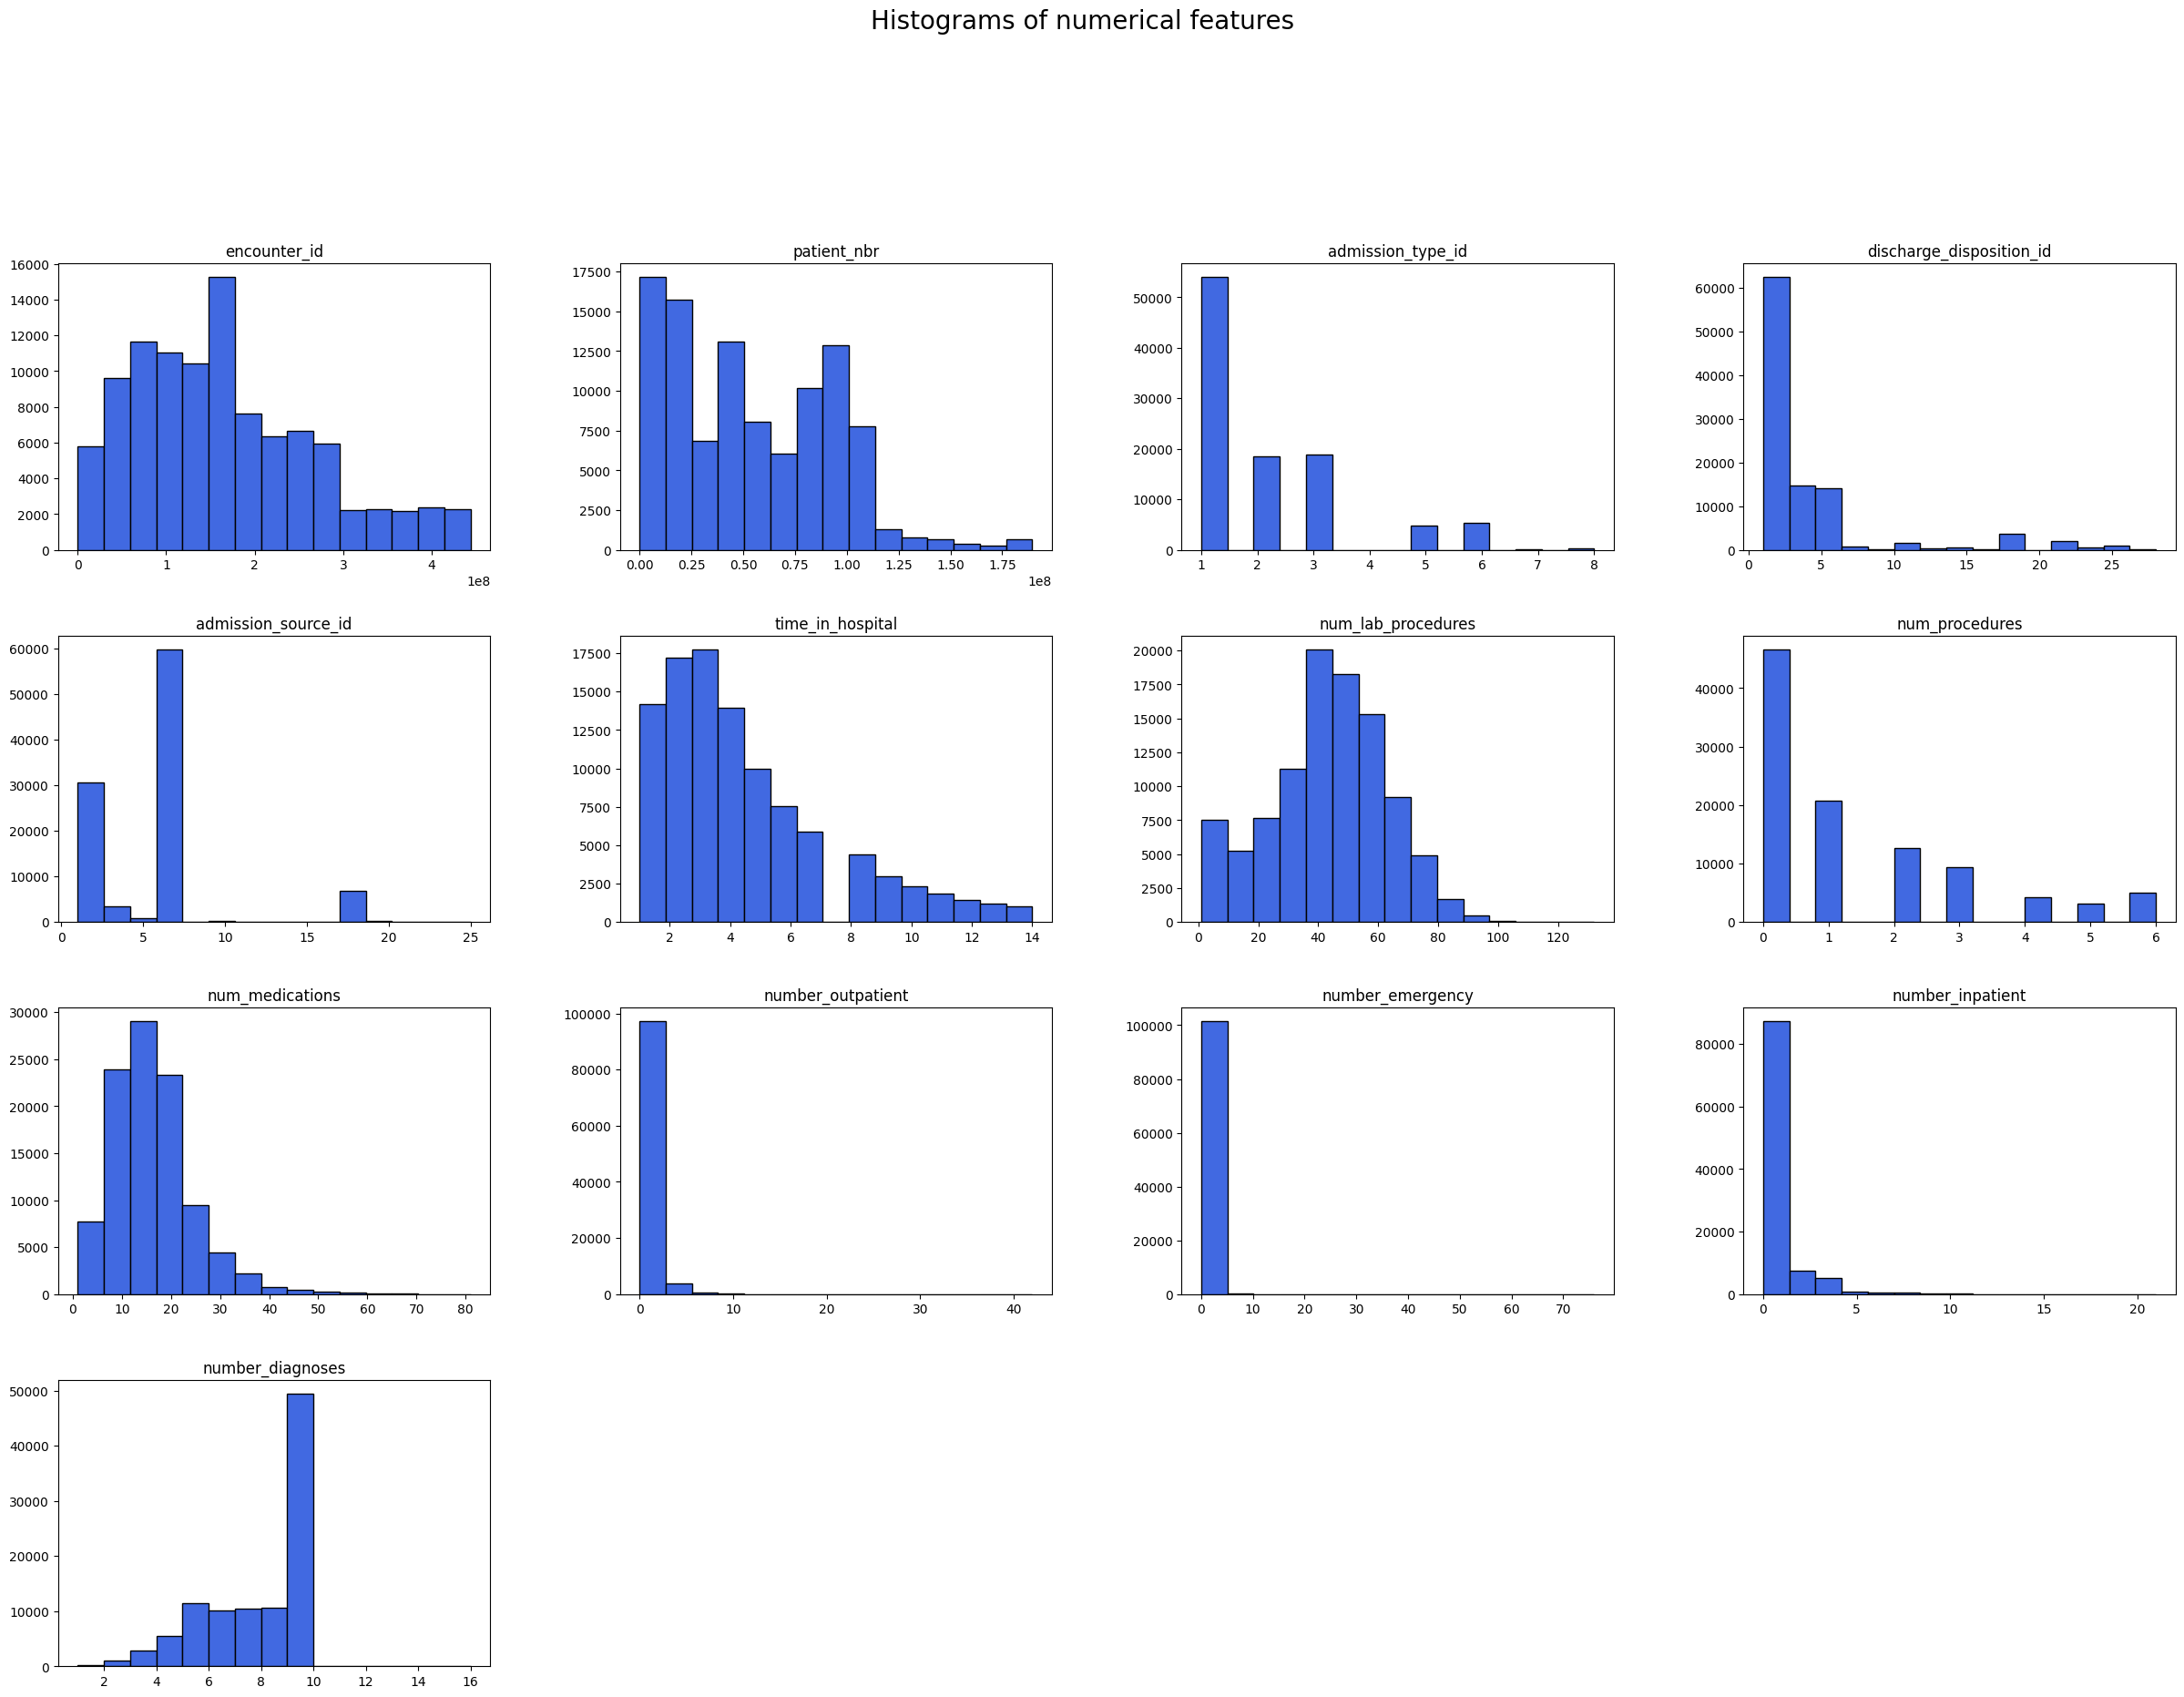

In [6]:
import matplotlib.pyplot as plt

# Visualize the dataset to gain insights (Histograms) to decide which columns need normal distribution
df.hist(figsize=(30, 20), bins = 15, edgecolor = 'black', grid = False, color = 'royalblue')
plt.suptitle('Histograms of numerical features', x = 0.5, y = 1.02, size = 20)

In [7]:
# Replace '?' with NaN for easier handling of missing values
df.replace('?', pd.NA, inplace=True)

# Identifying missing values per column
missing_values = df.isna().sum()

# Displaying columns with missing values and their counts
missing_values[missing_values > 0]

race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
dtype: int64

In [8]:
# Dropping the 'weight' column due to high proportion of missing values
df.drop('weight', axis=1, inplace=True)

# Imputing missing values for 'race', 'payer_code', and 'medical_specialty' with 'Unknown'
for column in ['race', 'payer_code', 'medical_specialty']:
    df[column].fillna('Unknown', inplace=True)

# For 'diag_1', 'diag_2', 'diag_3', impute missing values with the most frequent diagnosis code in each
for column in ['diag_1', 'diag_2', 'diag_3']:
    most_frequent = df[column].value_counts().idxmax()
    df[column].fillna(most_frequent, inplace=True)

# Verify if all missing values have been addressed
df.isna().sum().max()


0

In [9]:
X = df.drop(['readmitted', 'encounter_id', 'patient_nbr'], axis=1, errors='ignore')  # Define features, excluding non-informative columns
y = df['readmitted']  # Define the target variable

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, f1_score


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Define categorical and numeric features
categorical_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])  # Set sparse=False

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression (LR)

In [11]:
# Creating a pipeline that includes preprocessing and the model
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42, max_iter=5000))])

# Training the model
lr_pipeline.fit(X_train, y_train)

# Making predictions
y_pred = lr_pipeline.predict(X_test)

# Evaluating the model
accuracy_lr = accuracy_score(y_test, y_pred)
f1_score_lr = f1_score(y_test, y_pred, average='weighted')

print(f'Logistic Regression Accuracy: {accuracy_lr}')
print(f'Logistic Regression F1 Score: {f1_score_lr}')


Logistic Regression Accuracy: 0.5740395008352167
Logistic Regression F1 Score: 0.5248723077754783


# Decision Tree (DT)

In [12]:
# Creating a pipeline that includes preprocessing and the Decision Tree model
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier(random_state=42))])
# Training the Decision Tree model
dt_pipeline.fit(X_train, y_train)
# Making predictions
y_pred_dt = dt_pipeline.predict(X_test)

# Evaluating the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_score_dt = f1_score(y_test, y_pred_dt, average='weighted')  # Using 'weighted' due to potential class imbalance

print(f'Decision Tree Classification Accuracy: {accuracy_dt}')
print(f'Decision Tree F1 Score (Weighted): {f1_score_dt}')


Decision Tree Classification Accuracy: 0.49754348039697355
Decision Tree F1 Score (Weighted): 0.4927750891514533


# K Nearest Neighbour (KNN)

In [13]:
# Creating a pipeline that includes preprocessing and the KNN model
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier(n_neighbors=5))])  # n_neighbors can be tuned
# Training the KNN model
knn_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_knn = knn_pipeline.predict(X_test)

# Evaluating the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_score_knn = f1_score(y_test, y_pred_knn, average='weighted')

print(f'KNN Classification Accuracy: {accuracy_knn}')
print(f'KNN F1 Score (Weighted): {f1_score_knn}')



KNN Classification Accuracy: 0.5071239068487766
KNN F1 Score (Weighted): 0.5012980991189753


# Naive Bayes (NB)

In [14]:
# Creating a pipeline that includes preprocessing and the Naive Bayes model
nb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GaussianNB())])
# Training the Naive Bayes model
nb_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_nb = nb_pipeline.predict(X_test)

# Evaluating the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
f1_score_nb = f1_score(y_test, y_pred_nb, average='weighted')

print(f'Naive Bayes Classification Accuracy: {accuracy_nb}')
print(f'Naive Bayes F1 Score (Weighted): {f1_score_nb}')


Naive Bayes Classification Accuracy: 0.13677901149651175
Naive Bayes F1 Score (Weighted): 0.07706396714980084


# Multi Layer Perceptron (MLP)

In [15]:
from sklearn.neural_network import MLPClassifier
mlp_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', MLPClassifier(hidden_layer_sizes=(50, 75, 150, 75 , 50), max_iter=1000))])
mlp_pipeline.fit(X_train,y_train)

# Making predictions
y_pred_mlp = mlp_pipeline.predict(X_test)

# Evaluating the Naive Bayes model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
f1_score_mlp = f1_score(y_test, y_pred_mlp, average='weighted')

print(f'Multi Layer Perceptron Classification Accuracy: {accuracy_mlp}')
print(f'Multi Layer Perceptron F1 Score (Weighted): {f1_score_mlp}')


Multi Layer Perceptron Classification Accuracy: 0.5028986931315712
Multi Layer Perceptron F1 Score (Weighted): 0.4983871062772056


# Random Forest (RF)

In [16]:
# Creating a pipeline that includes preprocessing and the Random Forest model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])
# Training the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluating the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f'Random Forest Classification Accuracy: {accuracy_rf}')
print(f'Random Forest F1 Score (Weighted): {f1_score_rf}')


Random Forest Classification Accuracy: 0.5847499263044119
Random Forest F1 Score (Weighted): 0.5283081871491118


# Gradient Boosting (GB)

In [18]:
# Creating a pipeline that includes preprocessing and the Gradient Boosting model
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(random_state=42))])
# Training the Gradient Boosting model
gb_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_gb = gb_pipeline.predict(X_test)

# Evaluating the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_score_gb = f1_score(y_test, y_pred_gb, average='weighted')

print(f'Gradient Boosting Classification Accuracy: {accuracy_gb}')
print(f'Gradient Boosting F1 Score (Weighted): {f1_score_gb}')

Gradient Boosting Classification Accuracy: 0.5886803576692542
Gradient Boosting F1 Score (Weighted): 0.5359603712905998


# AdaBoost (AB)

In [17]:
# Creating a pipeline that includes preprocessing and the AdaBoost model
ab_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', AdaBoostClassifier(random_state=42))])
# Training the AdaBoost model
ab_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_ab = ab_pipeline.predict(X_test)

# Evaluating the AdaBoost model
accuracy_ab = accuracy_score(y_test, y_pred_ab)
f1_score_ab = f1_score(y_test, y_pred_ab, average='weighted')

print(f'AdaBoost Classification Accuracy: {accuracy_ab}')
print(f'AdaBoost F1 Score (Weighted): {f1_score_ab}')


AdaBoost Classification Accuracy: 0.5818021027807802
AdaBoost F1 Score (Weighted): 0.5291602985652633


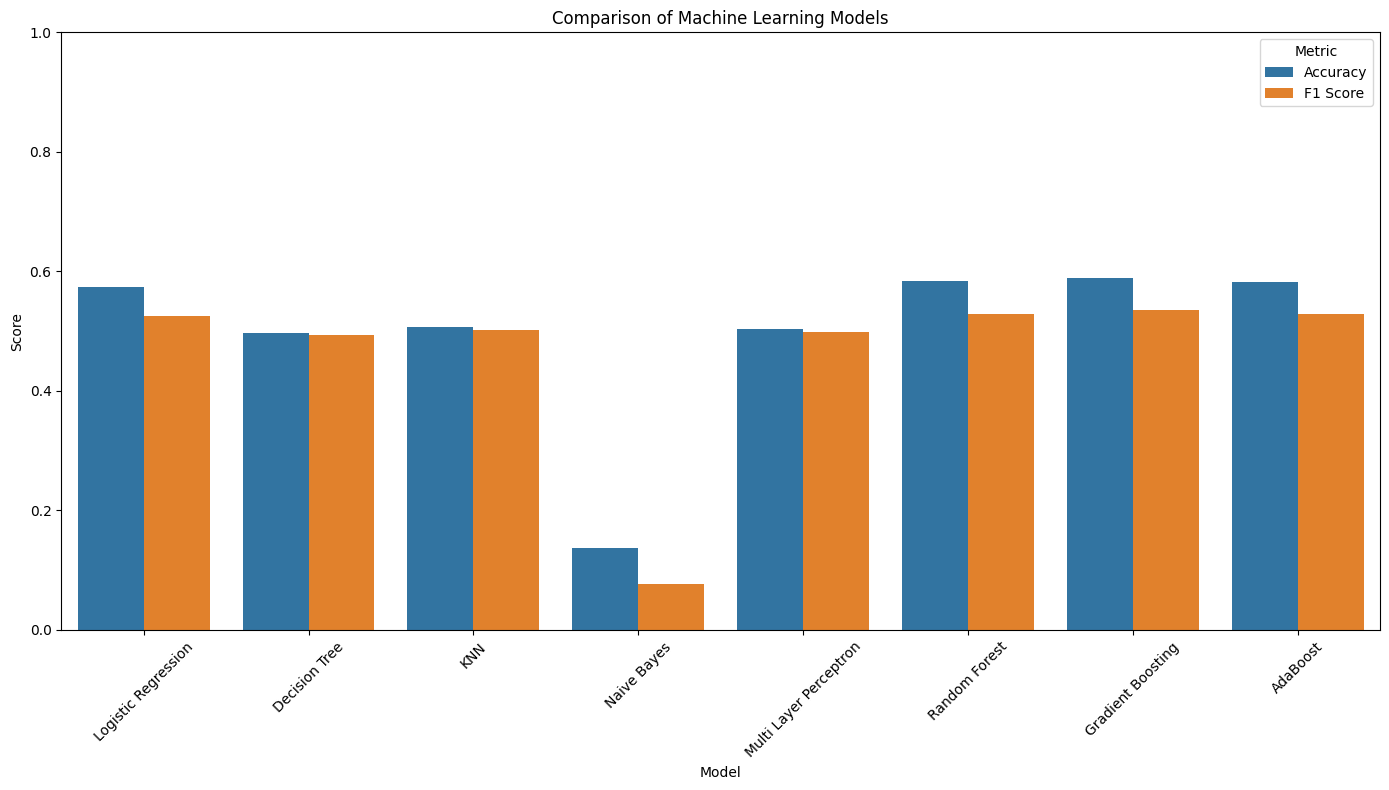

In [24]:
model_names = ['Logistic Regression', 'Decision Tree', 'KNN', 'Naive Bayes', 'Multi Layer Perceptron', 'Random Forest', 'Gradient Boosting', 'AdaBoost']
accuracies = [accuracy_lr, accuracy_dt, accuracy_knn, accuracy_nb, accuracy_mlp, accuracy_rf, accuracy_gb, accuracy_ab]
f1_scores = [f1_score_lr, f1_score_dt, f1_score_knn, f1_score_nb, f1_score_mlp, f1_score_rf, f1_score_gb, f1_score_ab]

# Preparing the data for plotting
data = []
for i, model_name in enumerate(model_names):
    data.append({'Model': model_name, 'Score': accuracies[i], 'Metric': 'Accuracy'})
    data.append({'Model': model_name, 'Score': f1_scores[i], 'Metric': 'F1 Score'})

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=df)

plt.title('Comparison of Machine Learning Models')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.ylim(0, 1)  # Assuming scores are between 0 and 1
plt.legend(title='Metric')

plt.tight_layout()
plt.show()

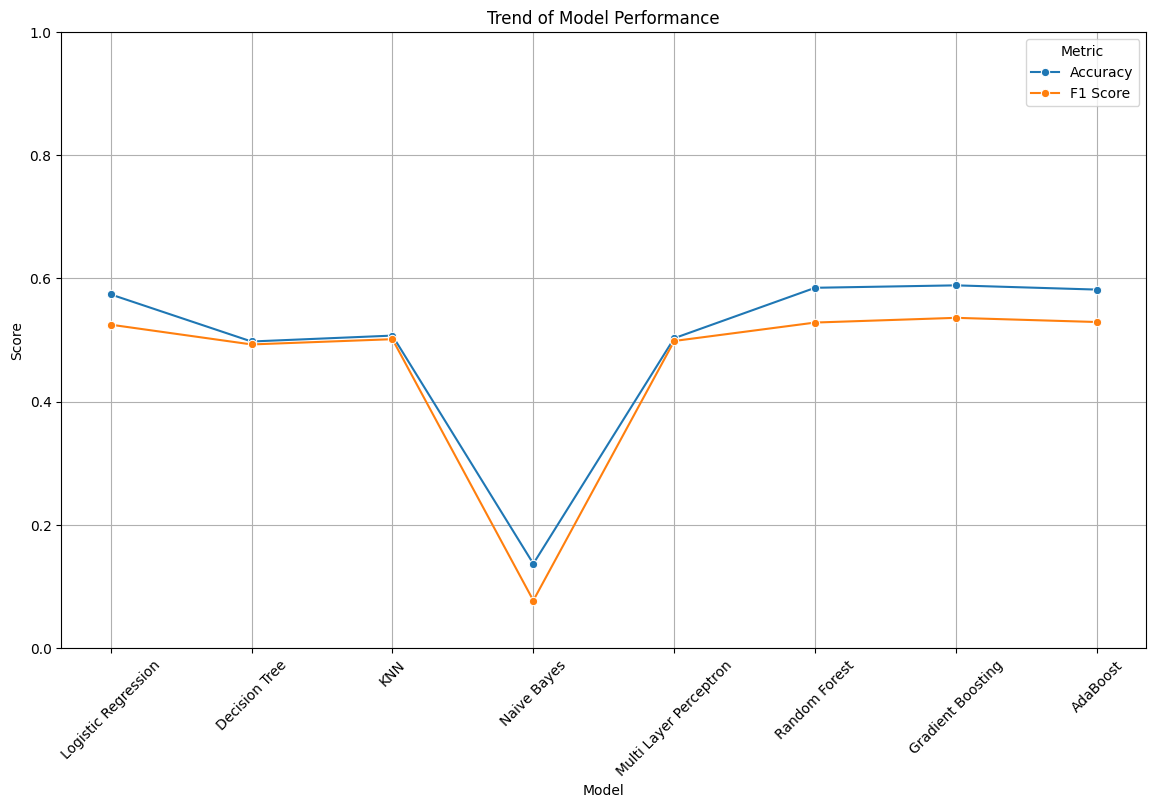

In [20]:
# Convert the model names into categorical type with orderedness for proper plotting
df['Model'] = pd.Categorical(df['Model'], categories=model_names, ordered=True)

plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Model', y='Score', hue='Metric', marker='o', sort=False)
plt.title('Trend of Model Performance')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


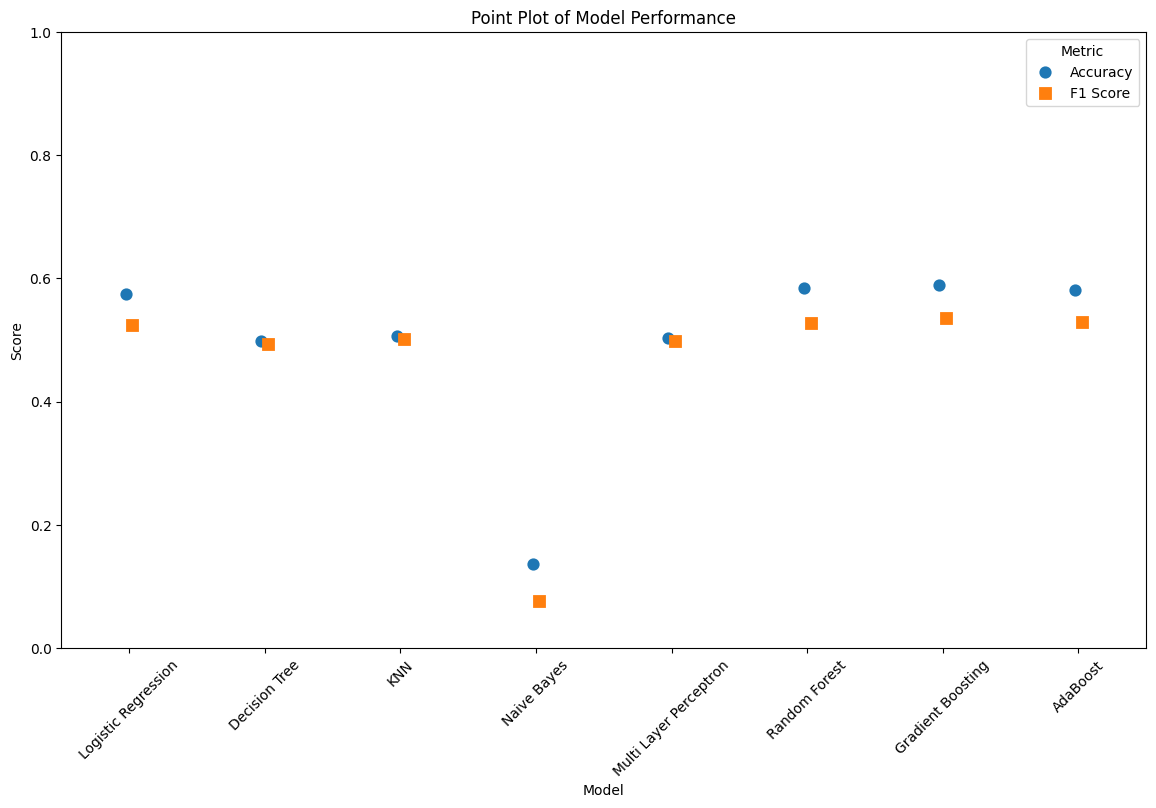

In [21]:
plt.figure(figsize=(14, 8))
sns.pointplot(data=df, x='Model', y='Score', hue='Metric', join=False, dodge=True, markers=['o', 's'], capsize=0.1)
plt.title('Point Plot of Model Performance')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()


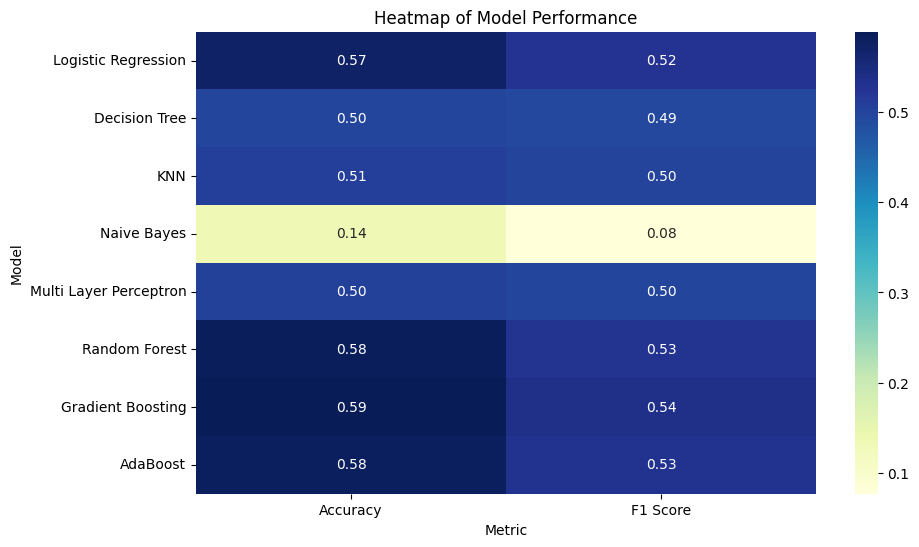

In [22]:
# Pivot the DataFrame to create a matrix format suitable for heatmap
heatmap_data = df.pivot("Model", "Metric", "Score")
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Heatmap of Model Performance')
plt.show()
